# Feature Generation for Ad Click Prediction

This document includes the code and exploratory analysis for generating the features which can be used in predicting the click for an ad.

### Business Problem

Generate the features for Ad Click Prediction Model. Such as highly_active, weekday_biz and any other feature. i.e. properties of a user, that might be predictive of clicking, and could be used in a predictive model.

### Data

One month of logs from the advertising platform for a subset of UUIDs.

logs.csv – each row represents an ad impression event.

#### Fields

* uuid-hashed cookie ID (you can think of it as a user ID).

* ts-timestamp of the event

* useragent-String containing info about browser, os etc

* hashed_ip-hash of the IP address

# Code for EDA and Feature Generation

#### Import the libraries required

In [1]:
import numpy as np
import pandas as pd
from datetime import date
from datetime import time
from datetime import datetime
import matplotlib.pyplot as plt

#### Read the data

In [2]:
file_location='C:/Users/cram/Desktop/logs.csv'

In [3]:
df = pd.read_csv(file_location)

In [4]:
df

,uuid,ts,useragent,hashed_ip
0,313908E1F6825D28ADF3FCE451E5B5E5,2017-07-11 09:31:44,Mozilla/5.0 (Windows NT 6.3; Trident/7.0; Touc...,7C222A735EE6
1,C7F60E6140A59120D9C9854CA87758DF,2017-07-11 23:24:43,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,A4ABB70D677A
2,2DC20DA3585AEDFD846E8679AE5C14C7,2017-07-11 11:29:40,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,4F32D980A86D
3,1C8B0E355480105C5C5B8B466399155F,2017-07-11 16:58:49,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:54.0) G...,848DDB6C94DE
4,86F243798AE16A55AFC1D3293279CCD5,2017-07-11 15:26:57,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:52.0) G...,BA557225B261
5,42F14D0B0C6D827EDE671491904B5EBD,2017-07-11 07:31:35,Mozilla/5.0 (Linux; Android 6.0.1; SM-G925F Bu...,77FD0601D10A
6,8DFC1B8495A5EF100CEA682AFB8C7D7C,2017-07-11 00:08:21,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,EE5EB85EEB47
7,9D758258C16B9A597D9E31249B2DF25C,2017-07-11 19:00:12,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,94538BF81103
8,BDBF7B79FF78AA95EBF7211B22E7E97D,2017-07-11 23:10:22,Mozilla/5.0 (iPhone; CPU iPhone OS 10_2_1 like...,D00B1CDC184B
9,154FCB27942F7789163E67693E600D7B,2017-07-11 23:10:19,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,E81DC286398C


#### Basic Stats

In [5]:
df.shape

(669491, 4)

In [6]:
df.describe()

,uuid,ts,useragent,hashed_ip
count,669491,669491,669473,669491
unique,257354,561881,17664,270797
top,58360C618E66720D851BCD72D41B2746,2017-07-16 12:14:44,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,010BB6D747D7
freq,923,13,52544,801


Convert ts column into a timestamp or date format

In [7]:
df["ts"]=df.ts.apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [8]:
df.dtypes

uuid                 object
ts           datetime64[ns]
useragent            object
hashed_ip            object
dtype: object

Create the Date Column

In [9]:
df["dt"]=df.ts.apply(lambda x:x.date())

In [10]:
df.dtypes

uuid                 object
ts           datetime64[ns]
useragent            object
hashed_ip            object
dt                   object
dtype: object

#### Get the Frequency of Events per user (All events)

In [11]:
all_events_per_user=df.groupby(["uuid"]).size().sort_values(ascending=False).reset_index(name='count')

In [12]:
all_events_per_user.describe()

,count
count,257354.000000
mean,2.601440
std,8.223889
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,923.000000


##### Look at the distribution of the event counts per user

In [13]:
events_per_user_distribution_df=all_events_per_user.groupby("count").size().sort_values(ascending=False).reset_index(name='usersCount').sort_index()

In [14]:
events_per_user_distribution_df.columns = ['eventCountsByUser', 'usersCount']
events_per_user_distribution_df = events_per_user_distribution_df.set_index('eventCountsByUser').sort_index()
events_per_user_distribution_df.head(10)

,usersCount
eventCountsByUser,
1,185374
2,24342
3,13835
4,7542
5,4996
6,3767
7,2673
8,2108
9,1704


In [15]:
%matplotlib inline

In [16]:
plt.rcParams["figure.figsize"] = (12,7)

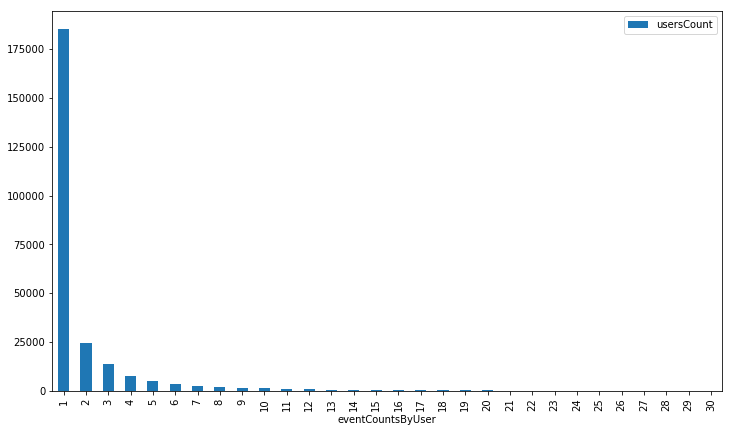

In [17]:
events_per_user_distribution_df.head(30).plot.bar(y='usersCount')

##### Get the 90th percentile value

In [18]:
val_90_percentile=all_events_per_user.quantile(0.90)["count"]

In [19]:
val_90_percentile

5.0

#### Get the Average Frequency of Events per user at Daily Level

In [20]:
daily_events_per_user=df.groupby(["uuid","dt"]).size().reset_index(name='count')

In [21]:
avg_daily_events_per_user=daily_events_per_user.groupby("uuid").mean().reset_index().sort_values(['count'], ascending=False)

In [22]:
avg_daily_events_per_user_distribution_df=avg_daily_events_per_user.groupby("count").size().sort_values(ascending=False).reset_index(name='usersCount')

In [23]:
avg_daily_events_per_user_distribution_df

,count,usersCount
0,1.000000,195856
1,2.000000,20104
2,3.000000,9269
3,1.500000,4731
4,4.000000,3937
5,5.000000,2385
6,6.000000,1666
7,1.333333,1605
8,2.500000,1508
9,1.666667,1164


In [24]:
avg_daily_events_per_user_distribution_df.columns = ['AvgDailyEventCountByUser', 'usersCount']
avg_daily_events_per_user_distribution_df = avg_daily_events_per_user_distribution_df.set_index('AvgDailyEventCountByUser').sort_index()
avg_daily_events_per_user_distribution_df.head(10)

,usersCount
AvgDailyEventCountByUser,
1.000000,195856
1.066667,1
1.100000,2
1.111111,7
1.125000,13
1.133333,1
1.142857,51
1.166667,119
1.181818,2


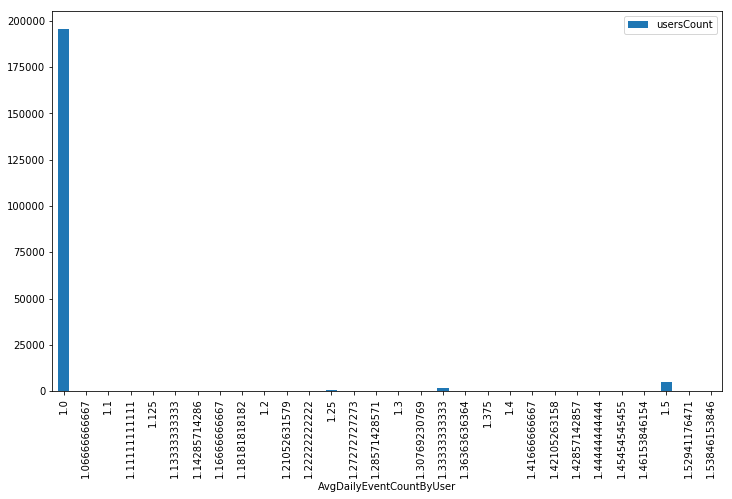

In [25]:
avg_daily_events_per_user_distribution_df.head(30).plot.bar(y='usersCount')

In [26]:
val_90_percentile1=avg_daily_events_per_user.quantile(0.90)["count"]

In [27]:
val_90_percentile1

3.0

Note : As per above analysis, it's difficult to define a cutoff for the average daily event counts for each user. Hence we proceed with the overall event counts for the highly_active feature

### highly_active user definition

* highly_active: Whether the user is highly active, i.e. has a large number of events (True/False)

* If a user is having event counts greater than the 90th percentile (or 95th percentile) of the all users' overall event counts, we can call it as a highly active user.

In [28]:
all_events_per_user["highly_active"]=all_events_per_user["count"].apply(lambda x:x>=val_90_percentile)

In [29]:
highly_active_df=all_events_per_user.loc[:,["uuid","highly_active"]]
highly_active_df

,uuid,highly_active
0,58360C618E66720D851BCD72D41B2746,True
1,717F27005D130A8F9927E131C1D53121,True
2,20146724949FAFD85AE666BBE38F1163,True
3,C3BF3AF36A95244CE112A523FD91508C,True
4,483979DB7BD64575B8E73E451D6B1B2D,True
5,3D6FA6D79C1EF48D9B489A3DEBE2B2DE,True
6,C4D6ED9AF4EE2FDD80A01DEB50E96ECB,True
7,F4E9C4C42660EF660AC5910329D1CC88,True
8,40D4543E015574F1D6151FF453C0A976,True
9,E73762C0AAF6E1E20EB04DFDE95EFB90,True


In [30]:
highly_active_distribution=highly_active_df.groupby("highly_active").size()

In [31]:
highly_active_distribution

highly_active
False    231093
True      26261
dtype: int64

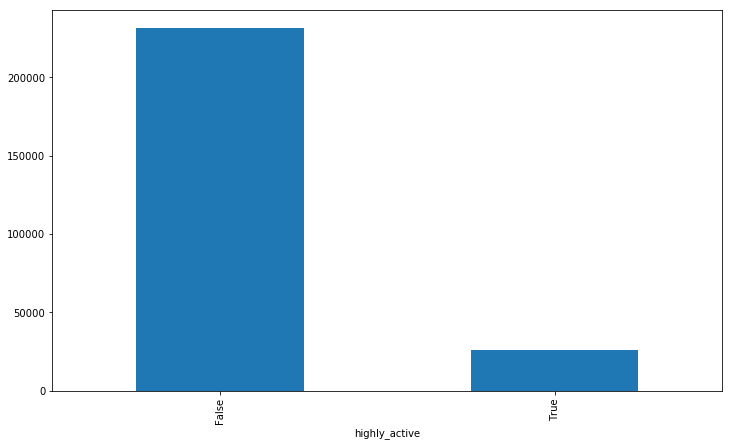

In [32]:
highly_active_distribution.plot.bar()

### weekday_biz feature

* Whether the user's traffic tends to occur during weekday business hours (True/False)

* Weekdays = Monday to Friday

* Business Hours = 9:00 to 18:00 hours ( 9 am to 6 pm)

In [33]:
weekdays = [0, 1 ,2, 3, 4]
bizhours = [9 , 18] # 9 am to 6 pm

First define the weekday_biz_hours features based on time stamp for each event

In [34]:
df["weekday_biz_hours"]=df.ts.apply(lambda x:1 if (bizhours[0]<=x.hour<=bizhours[1]) and (x.weekday() in weekdays) else 0)

Now Aggregate the data at the user level

In [35]:
weekday_biz_df=df.loc[:,["uuid","weekday_biz_hours"]].groupby("uuid").sum().reset_index()

Define the weekday_biz feature based on the weekday_biz_hours counts

In [36]:
weekday_biz_df["weekday_biz"]=weekday_biz_df.weekday_biz_hours.apply(lambda x:x>0)

In [37]:
weekday_biz_final_df=weekday_biz_df.loc[:,["uuid","weekday_biz"]]

In [38]:
weekday_biz_final_df

,uuid,weekday_biz
0,0000AE02C6B52538D17DFAF66F2ACAF1,False
1,0000CD03517160EAEDB23A93A16489AE,False
2,0000F516516CD22AC34384D65FE369B6,False
3,0000FBBCD26E0934C890EF3BE71B3122,False
4,00011B831B460DD8EF00C3214E1F794F,False
5,000124E7DB33683745C16181B51B9400,True
6,00015D114458660BDCF15F7B4FA9B933,True
7,00017B671B96A7A28B78F965D325B8C2,False
8,00021EA3CBA4E3A56AEA6EFC3F93B723,False
9,00025C5FB0B4BEC9FB67F431D9BE5ECC,True


In [39]:
weekday_biz_distribution=weekday_biz_final_df.groupby("weekday_biz").size()

In [40]:
weekday_biz_distribution

weekday_biz
False    145637
True     111717
dtype: int64

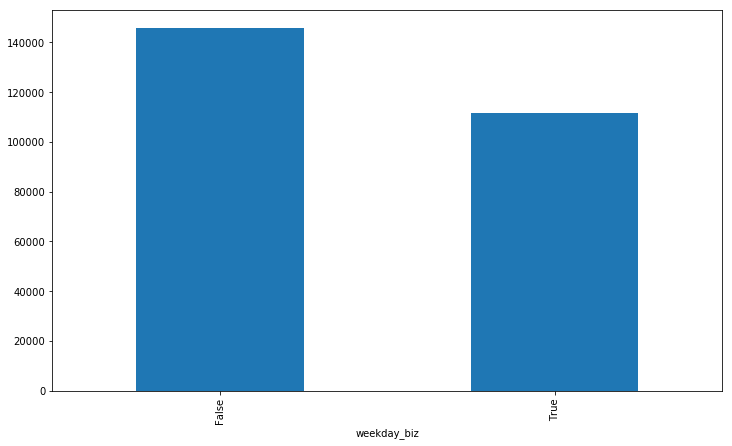

In [41]:
weekday_biz_distribution.plot.bar()

### Fourth feature - Recency (In terms of : No. of Days since last event for a user)

* Recency factor is an important one in the context of ad click, it identifies whether user is still attached or attracted towards the content or the ad we're offering or user has moved or liked something else. If user was active in near past, there are high chances that he will click a related ad. ( This also takes the users' memory factor into consideration. Whether he remembers past transactions/interactions/events or not )

* Recency can be defined as numeric or boolean(is_recent or not ). For simplicity, here we'll go with the numeric measure.

#### Define/specify End date for Recency look-back

In [42]:
end_date="2017-08-01 00:00:00" # The date from which the look-back is to be done. Taking 1st August here to look back for July Events
end_ts=datetime.strptime(end_date,'%Y-%m-%d %H:%M:%S')

In [43]:
end_ts

datetime.datetime(2017, 8, 1, 0, 0)

#### First Get the Last Event Date/timestamp for each user

In [44]:
df_gb=df.loc[:,["uuid","ts"]].groupby("uuid")

In [45]:
df_last_event=df_gb["ts"].agg({'last_event' : np.max}).reset_index()

#### Now Calculate the Days since Last Event date

In [46]:
df_last_event["days_since_last_event"]=df_last_event.last_event.apply(lambda x:(end_ts-x).days)

In [47]:
df_last_event_final=df_last_event.loc[:,["uuid","days_since_last_event"]]

In [48]:
df_last_event_final

,uuid,days_since_last_event
0,0000AE02C6B52538D17DFAF66F2ACAF1,5
1,0000CD03517160EAEDB23A93A16489AE,8
2,0000F516516CD22AC34384D65FE369B6,5
3,0000FBBCD26E0934C890EF3BE71B3122,15
4,00011B831B460DD8EF00C3214E1F794F,9
5,000124E7DB33683745C16181B51B9400,21
6,00015D114458660BDCF15F7B4FA9B933,10
7,00017B671B96A7A28B78F965D325B8C2,11
8,00021EA3CBA4E3A56AEA6EFC3F93B723,22
9,00025C5FB0B4BEC9FB67F431D9BE5ECC,14


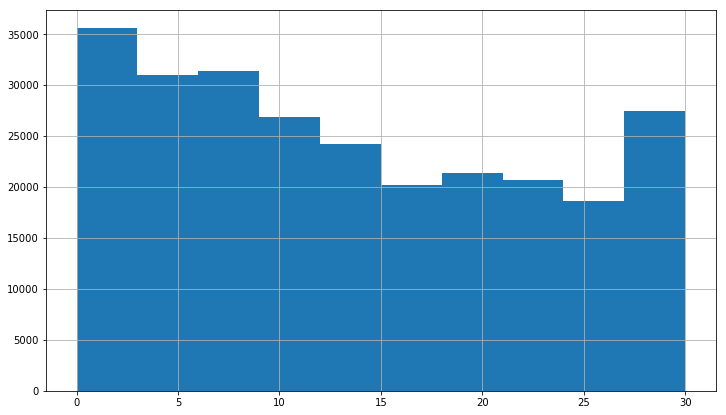

In [49]:
df_last_event_final["days_since_last_event"].hist()

### Combine All the Features

Merge the 3 dataframes highly_active_df,weekday_biz_final_df,df_last_event_final

In [50]:
df_final=highly_active_df.merge(weekday_biz_final_df,on="uuid").merge(df_last_event_final,on="uuid")

In [51]:
df_final

,uuid,highly_active,weekday_biz,days_since_last_event
0,58360C618E66720D851BCD72D41B2746,True,True,3
1,717F27005D130A8F9927E131C1D53121,True,True,0
2,20146724949FAFD85AE666BBE38F1163,True,True,0
3,C3BF3AF36A95244CE112A523FD91508C,True,True,6
4,483979DB7BD64575B8E73E451D6B1B2D,True,True,0
5,3D6FA6D79C1EF48D9B489A3DEBE2B2DE,True,True,0
6,C4D6ED9AF4EE2FDD80A01DEB50E96ECB,True,True,1
7,F4E9C4C42660EF660AC5910329D1CC88,True,True,4
8,40D4543E015574F1D6151FF453C0A976,True,True,0
9,E73762C0AAF6E1E20EB04DFDE95EFB90,True,True,3


#### Write the output file

In [52]:
df_final.to_csv('output.csv', sep=',')

### Other possible Features

* Tenure of a user ( Time between first and last event)

* No. of distinct IPs ( On which a user has appeared on)

* No. of Distinct Devices used by a user ( This can be found out by parsing the user agent header string.)

* Average gaps between events for a user

* Preferred time slot of the user ( Weekdays or Weekend, Morning/Afternoon/Evening/Night )

### Questions

* What about the click info for these users? Are all the events related to successful ad clicks?